In [2]:
from matplotlib import pyplot as plt 
import numpy as np 
import pickle as pkl
import os
from scipy.stats import spearmanr

In [3]:
corrupt_res_ls = [pkl.load(open(f'/home/teddy/local/DVGS/adult_results/{x}/corruption_res_dict.pkl', 'rb')) for x in os.listdir('../adult_results/')]

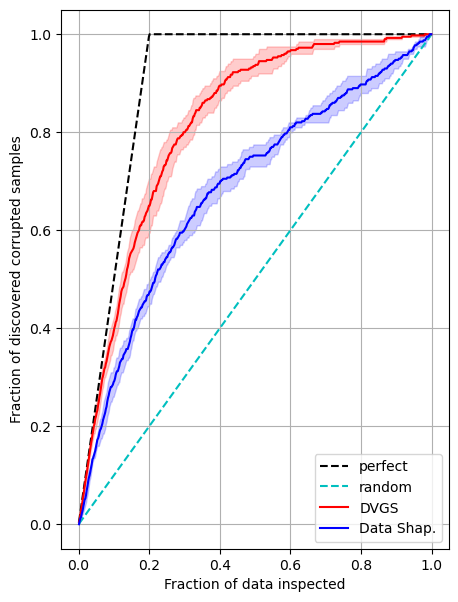

In [10]:

plt.figure(figsize=(5, 7))
plt.plot(corrupt_res_ls[0]['pk'], corrupt_res_ls[0]['p_perfect'], 'k--', label='perfect')
plt.plot(corrupt_res_ls[0]['pk'], corrupt_res_ls[0]['p_random'], 'c--', label='random')

dvgs = []; shap = []; dvrl = [] 
for i,cres in enumerate(corrupt_res_ls):

    dvgs.append(cres['dvgs_corr']) 
    dvrl.append(cres['dvrl_corr']) 
    shap.append(cres['shap_corr']) 

dvgs = np.stack(dvgs, axis=0)
dvrl = np.stack(dvrl, axis=0)
shap = np.stack(shap, axis=0)

plt.plot(cres['pk'], dvgs.mean(axis=0), color='r', label='DVGS')
plt.fill_between(cres['pk'], (dvgs.mean(axis=0)-dvgs.std(axis=0)), (dvgs.mean(axis=0)+dvgs.std(axis=0)), color='r', alpha=.2)

#plt.plot(cres['pk'], dvrl.mean(axis=0), color='g', label='DVRL')
#plt.fill_between(cres['pk'], (dvrl.mean(axis=0)-dvrl.std(axis=0)), (dvrl.mean(axis=0)+dvrl.std(axis=0)), color='g', alpha=.2)

plt.plot(cres['pk'], shap.mean(axis=0), color='b', label='Data Shap.')
plt.fill_between(cres['pk'], (shap.mean(axis=0)-shap.std(axis=0)), (shap.mean(axis=0)+shap.std(axis=0)), color='b', alpha=.2)

plt.legend()
plt.ylabel('Fraction of discovered corrupted samples')
plt.xlabel('Fraction of data inspected')
plt.grid(b=None)
plt.show()

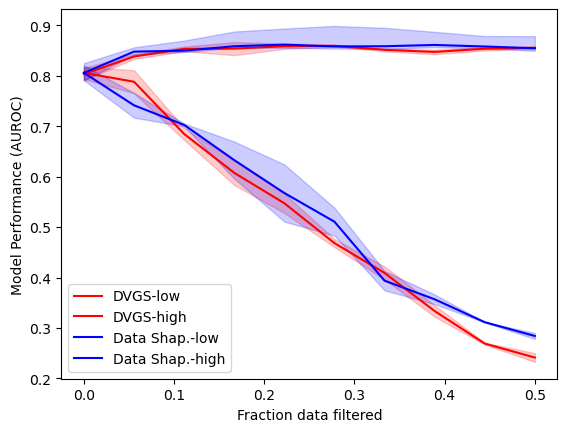

In [18]:
filter_res_ls = [pkl.load(open(f'/home/teddy/local/DVGS/adult_results/{x}/filtered_score_res_dict.pkl', 'rb')) for x in os.listdir('../adult_results/')]
plt.figure()

dvgs_low = []; dvgs_high = []; shap_low = []; shap_high = []; dvrl_low = []; dvrl_high = [] 
for i,filter_res in enumerate(filter_res_ls):

    dvgs_low.append(filter_res['dvgs_low']) 
    dvgs_high.append(filter_res['dvgs_high']) 
    
    dvrl_low.append(filter_res['dvrl_low']) 
    dvrl_high.append(filter_res['dvrl_high']) 

    shap_low.append(filter_res['shap_low']) 
    shap_high.append(filter_res['shap_high']) 

dvgs_low = np.stack(dvgs_low, axis=0)
dvgs_high = np.stack(dvgs_high, axis=0)

dvrl_low = np.stack(dvrl_low, axis=0)
dvrl_high = np.stack(dvrl_high, axis=0)

shap_low = np.stack(shap_low, axis=0)
shap_high = np.stack(shap_high, axis=0)

plt.plot(filter_res['qs'], dvgs_low.mean(axis=0), color='r', label='DVGS-low')
plt.fill_between(filter_res['qs'], (dvgs_low.mean(axis=0)-dvgs_low.std(axis=0)), (dvgs_low.mean(axis=0)+dvgs_low.std(axis=0)), color='r', alpha=.2)

plt.plot(filter_res['qs'], dvgs_high.mean(axis=0), color='r', label='DVGS-high')
plt.fill_between(filter_res['qs'], (dvgs_high.mean(axis=0)-dvgs_high.std(axis=0)), (dvgs_high.mean(axis=0)+dvgs_high.std(axis=0)), color='r', alpha=.2)

#plt.plot(filter_res['qs'], dvrl_low.mean(axis=0), color='g', label='DVRL-low')
#plt.fill_between(filter_res['qs'], (dvrl_low.mean(axis=0)-dvrl_low.std(axis=0)), (dvrl_low.mean(axis=0)+dvrl_low.std(axis=0)), color='g', alpha=.2)

#plt.plot(filter_res['qs'], dvrl_high.mean(axis=0), color='g', label='DVRl-high')
#plt.fill_between(filter_res['qs'], (dvrl_high.mean(axis=0)-dvrl_high.std(axis=0)), (dvrl_high.mean(axis=0)+dvrl_high.std(axis=0)), color='g', alpha=.2)

plt.plot(filter_res['qs'], shap_low.mean(axis=0), color='b', label='Data Shap.-low')
plt.fill_between(filter_res['qs'], (shap_low.mean(axis=0)-shap_low.std(axis=0)), (shap_low.mean(axis=0)+dvrl_low.std(axis=0)), color='b', alpha=.2)

plt.plot(filter_res['qs'], shap_high.mean(axis=0), color='b', label='Data Shap.-high')
plt.fill_between(filter_res['qs'], (shap_high.mean(axis=0)-shap_high.std(axis=0)), (shap_high.mean(axis=0)+shap_high.std(axis=0)), color='b', alpha=.2)

plt.xlabel('Fraction data filtered')
plt.ylabel('Model Performance (AUROC)')
plt.legend() 
plt.show()

In [5]:
shap_data_values = [np.load(f'../adult_results/{x}/dshap_data_values.npy') for x in os.listdir('../adult_results/')]
dvgs_data_values = [np.load(f'../adult_results/{x}/dvgs_data_values.npy') for x in os.listdir('../adult_results/')]


In [9]:
for dvgs, shap in zip(dvgs_data_values, shap_data_values): 
    print(spearmanr(dvgs,shap)[0])

0.485963561963562
0.5601423081423081
